In [1]:
import os
import tabulate
import pandas as pd
from rmgpy.tools.uncertainty import Uncertainty, process_local_results
from rmgpy.tools.canteramodel import get_rmg_species_from_user_species
from rmgpy.species import Species

# these are for showing the flux diagram
from IPython.display import Image


In [2]:
# Load the model
# Must use annotated chemkin file

model_dir = '/home/moon/rmg/my_examples/ethane/'

chemkin_file = os.path.join(model_dir, 'chemkin', 'chem_annotated.inp')
dict_file = os.path.join(model_dir, 'chemkin', 'species_dictionary.txt')

# Initialize the Uncertainty class instance and load the model
uncertainty = Uncertainty(output_directory=os.path.join(model_dir, 'chemkin'))
uncertainty.load_model(chemkin_file, dict_file)


Ethane pyrolysis produces ethylene (C2H4)

In [3]:
# optional - generate flux diagram:

# from rmgpy.tools import fluxdiagram

# input_file = os.path.join(model_dir, 'input.py')
# output_path = os.path.join(model_dir, 'flux_diagram')
# fluxdiagram.create_flux_diagram(input_file, chemkin_file, dict_file, save_path=output_path)

In [4]:
# Map the species to the objects within the Uncertainty class
ethane = Species().from_smiles('CC')
C2H4 = Species().from_smiles('C=C')
mapping = get_rmg_species_from_user_species([ethane, C2H4], uncertainty.species_list)

# Define the reaction conditions
initial_mole_fractions = {mapping[ethane]: 1.0}
T = (1300, 'K')
P = (1, 'bar')
termination_time = (0.5, 'ms')
sensitive_species=[mapping[ethane], mapping[C2H4]]

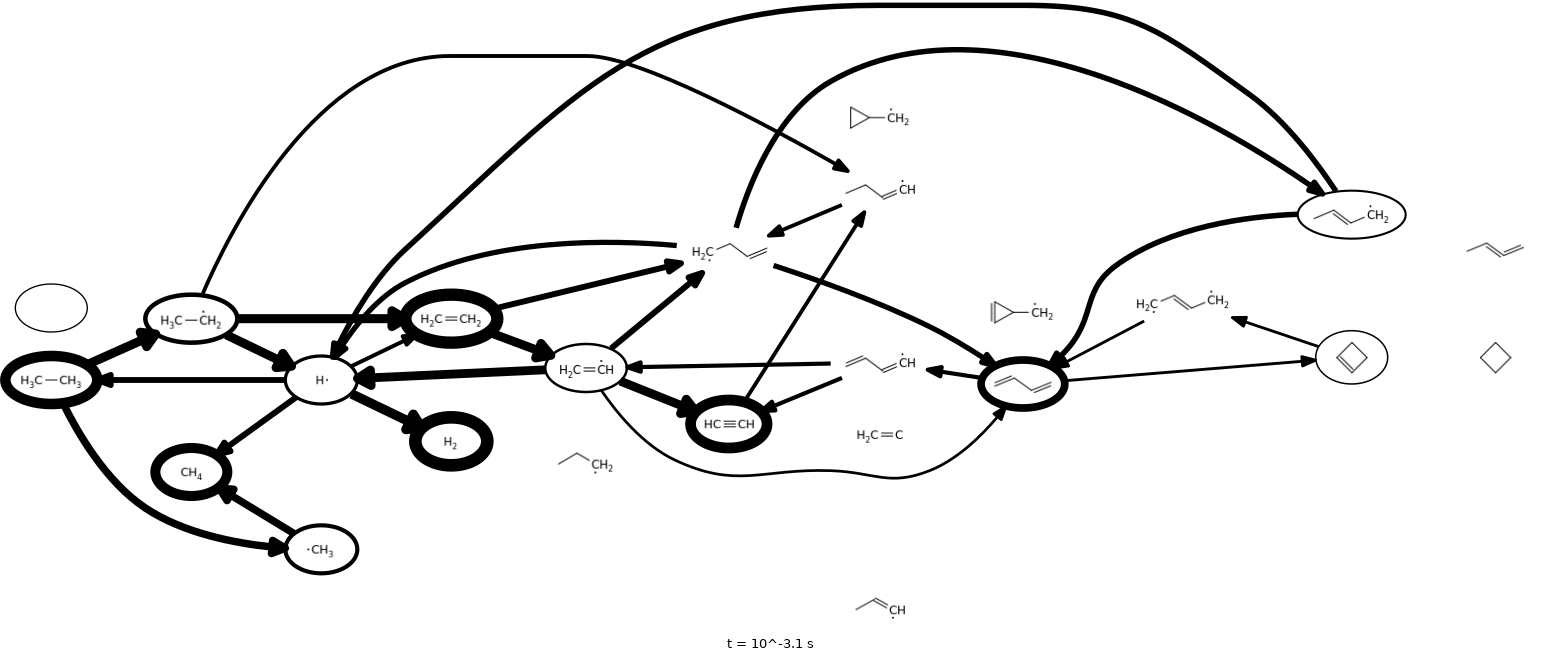

In [5]:
Image(filename="/home/moon/rmg/my_examples/ethane/flux_diagram/1/flux_diagram_0148.png")


In [6]:
# Perform the sensitivity analysis
uncertainty.sensitivity_analysis(initial_mole_fractions, sensitive_species, T, P, termination_time, number=5, fileformat='.png')

ethane(1): Reaction Sensitivities


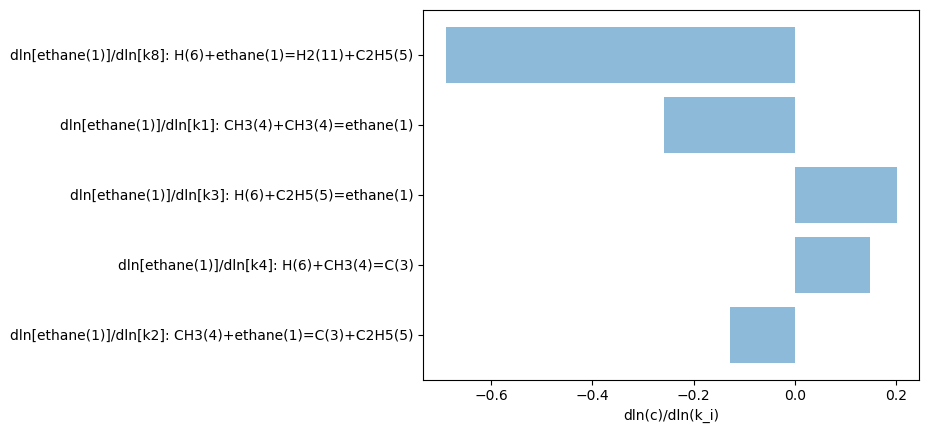

ethane(1): Thermo Sensitivities


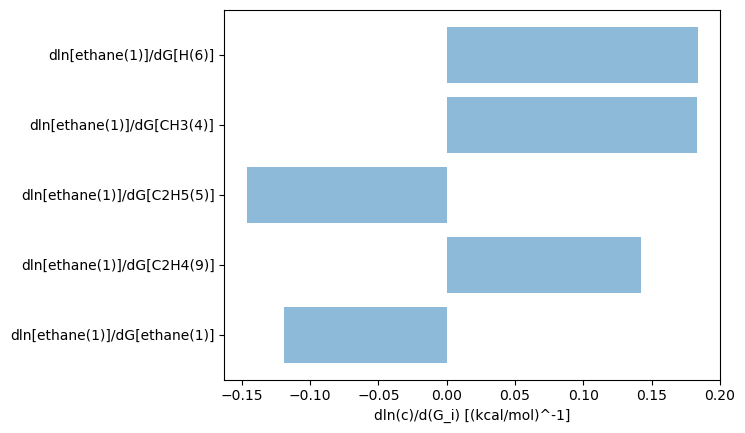

C=C(9): Reaction Sensitivities


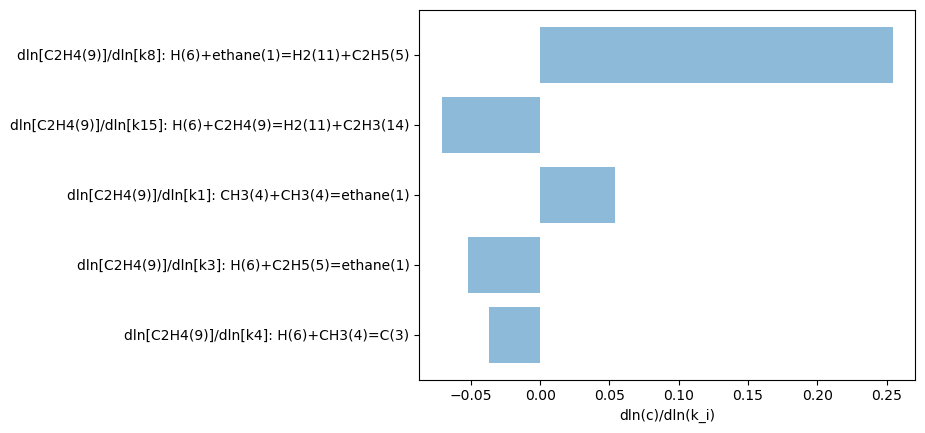

C=C(9): Thermo Sensitivities


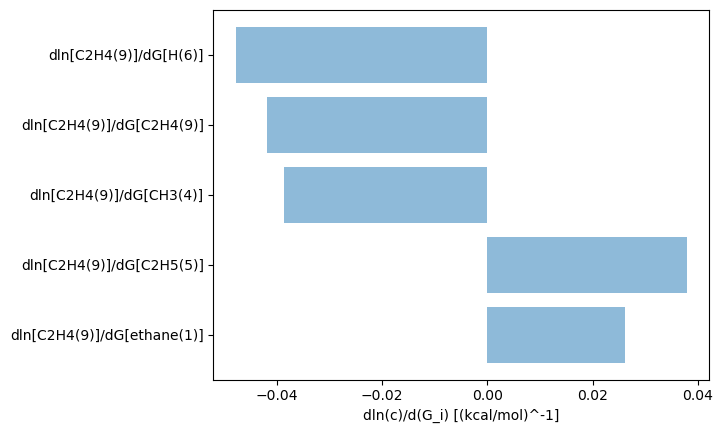

In [7]:
# Show the sensitivity plots
for species in sensitive_species:
    print('{}: Reaction Sensitivities'.format(species))
    index = species.index
    display(Image(filename=os.path.join(uncertainty.output_directory,'solver','sensitivity_1_SPC_{}_reactions.png'.format(index))))
    
    print('{}: Thermo Sensitivities'.format(species))
    display(Image(filename=os.path.join(uncertainty.output_directory,'solver','sensitivity_1_SPC_{}_thermo.png'.format(index))))

In [8]:
# NOTE: You must load the database with the same settings which were used to generate the model.
#       This includes any thermo or kinetics libraries which were used.
uncertainty.load_database(
    thermo_libraries=['primaryThermoLibrary'],
    kinetics_families='default',
    reaction_libraries=[],
)

In [9]:
uncertainty.extract_sources_from_model()
uncertainty.assign_parameter_uncertainties()

KeyError: 'R4_SDS'

In [ ]:
result = uncertainty.local_analysis(sensitive_species, correlated=False, number=15, fileformat='.png')
print(process_local_results(result, sensitive_species, number=15)[1])

In [ ]:
# for i, rxn in enumerate(uncertainty.reaction_list):
#     print(rxn.family)
print(uncertainty.reaction_list[6].family)